# AML Exercise Sheet 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

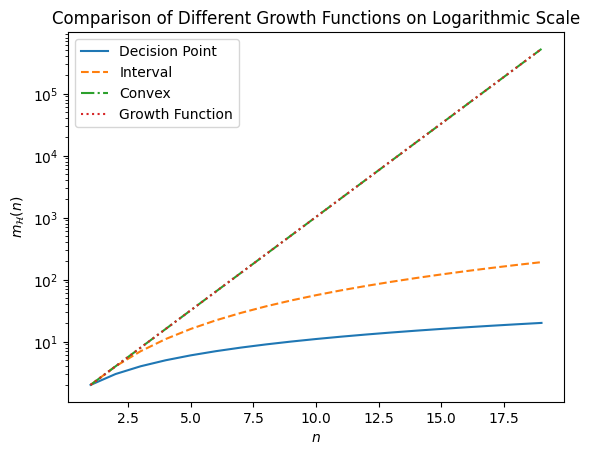

In [3]:
functions = {
    "Decision Point": lambda n: n + 1,
    "Interval": lambda n: (n**2 + n) / 2 + 1,
    "Convex": lambda n: 2**n,
    "Growth Function": lambda n: 2**n
}

xs = np.arange(1, 20)

line_styles = ['-', '--', '-.', ':']
for (name, func), ls in zip(functions.items(), line_styles):
    plt.plot(xs, func(xs), label=name, linestyle=ls)

# Set the y-scale to logarithmic for better visualization
plt.yscale('log')
# plt.xscale('log')

plt.xlabel('$n$')
plt.ylabel('$m_{\mathcal{H}}(n)$')
plt.title('Comparison of Different Growth Functions on Logarithmic Scale')
plt.legend()
plt.show()

## Exercise 3

In [50]:
def f_bayes(x):
    return ((0.2 <= x) & (x <= 0.8)).astype(int)

def f_theta (x, theta=0.5):
    if not 0 <= theta <= 1:
        raise ValueError(f"Theta must be in [0, 1].")
    return (x >= theta).astype(int)

def f_ab (x, a=0.25, b=0.75):
    if not ((a >= 0) and (a <= b) and (b <= 1)):
        raise ValueError()
    return ((a <= x) & (x <= b)).astype(int)

In [57]:
N = int(1e5)
X = np.random.uniform(low=0.0, high=1.0, size=N)
Y = f_bayes(X)

In [58]:
def empirical_risk(X, Y, hypothesis):
    predictions = hypothesis(X)
    return np.mean(predictions != Y)

In [59]:
# For f_bayes, as it has no parameters to vary
erm_risk_bayes = empirical_risk(X, Y, f_bayes)

In [63]:
def ERM_theta (X, Y):
    # For f_theta, vary theta over [0, 1]
    theta_values = np.linspace(0, 1, num=100)
    erm_risks_theta = [empirical_risk(X, Y, lambda x: f_theta(x, theta)) for theta in theta_values]
    optimal_theta = theta_values[np.argmin(erm_risks_theta)]

    return optimal_theta

In [64]:
def ERM_ab (X, Y):
    # For f_ab, vary a and b over [0, 1] with a <= b
    a_values = np.linspace(0, 1, num=50)  # Adjust granularity as needed
    b_values = np.linspace(0, 1, num=50)  # Adjust granularity as needed
    erm_risks_ab = np.inf
    optimal_a, optimal_b = 0, 1

    for a in a_values:
        for b in b_values:
            if a <= b:
                risk = empirical_risk(X, Y, lambda x: f_ab(x, a, b))
                if risk < erm_risks_ab:
                    erm_risks_ab = risk
                    optimal_a, optimal_b = a, b

    return optimal_a, optimal_b

In [71]:
T = 100
n = 100
epsilon = 0.1

oob_theta = np.zeros(T)
oob_ab = np.zeros(T)

for i in range(T):
    indices = np.random.choice(N, size=n, replace=False)
    X_sample = X[indices]
    Y_sample = Y[indices]

    # theta hypothesis class
    theta_learned = ERM_theta(X_sample, Y_sample)
    Rn = empirical_risk(X_sample, Y_sample, lambda x: f_theta(x, theta=theta_learned))
    R = empirical_risk(X, Y, lambda x: f_theta(x, theta=theta_learned))
    oob_theta[i] = np.linalg.norm(Rn - R) > epsilon

    a_learned, b_learned = ERM_ab(X_sample, Y_sample)
    Rn = empirical_risk(X_sample, Y_sample, lambda x: f_ab(x, a=a_learned, b=b_learned))
    R = empirical_risk(X, Y, lambda x: f_ab(x, a=a_learned, b=b_learned))
    oob_ab[i] = np.linalg.norm(Rn - R) > epsilon


print(f"Estimate for P(|Rn - R| >= e) using theta:\t{np.mean(oob_theta) * 100 :.2f}%")
print(f"Estimate for P(|Rn - R| >= e) using a, b:\t{np.mean(oob_ab) * 100 :.2f}%")

Estimate for P(|Rn - R| >= e) using theta:	1.00%
Estimate for P(|Rn - R| >= e) using a, b:	0.00%
